<a href="https://colab.research.google.com/github/IBREEZZ/DL_PROJECT/blob/main/DL(simple%2CDeeper%2CVGG%2CResNet%2CGooglNet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Automated Waste Sorting**

Develop a machine learning model that can automatically sort waste into different categories using image recognition techniques. This system can contribute to efficient waste recycling by reducing human error and increasing the accuracy of waste sorting.

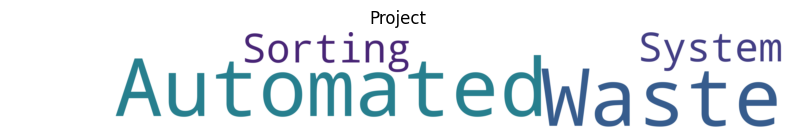

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = "Automated Waste Sorting System "
wordcloud = WordCloud(width=8000, height=1000, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Project')
plt.show()

# Split the data

In [1]:
# !pip install split-folders

In [ ]:
# import splitfolders

In [ ]:
# Must run it to show the drive folder:
# Run this cell if u can't mount ur drive automatically
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#set the directory
# input_file = '/content/drive/MyDrive/DL_PROJECT/recycling_waste'
# output_file = '/content/drive/MyDrive/DL_PROJECT/recycling_waste_split'

In [2]:
# Split it into Train and Validation
# splitfolders.ratio(input_file, output=output_file, seed=38, ratio=(.75, .25), group_prefix=None)

In [ ]:
root_dir = '/content/drive/MyDrive/DL_PROJECT/recycling_waste_split'
train_ds = '/content/drive/MyDrive/DL_PROJECT/recycling_waste_split/train'
val_ds = '/content/drive/MyDrive/DL_PROJECT/recycling_waste_split/val'

In [ ]:
#make sure that the picture don't have any error or damage
# import PIL
# from pathlib import Path
# from PIL import UnidentifiedImageError

# path = Path(val_ds).rglob("*.jpg")
# for img_p in path:
#     try:
#         img = PIL.Image.open(img_p)
#     except PIL.UnidentifiedImageError:
#             print(img_p)

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
train_dataset = image_dataset_from_directory(train_ds, image_size=(64, 64), batch_size=32)
val_dataset = image_dataset_from_directory(val_ds, image_size=(64, 64), batch_size=32)

# Exploratory Data Analysis (EDA)

Number of classes: 9
Number of images per class: 474 - 1087


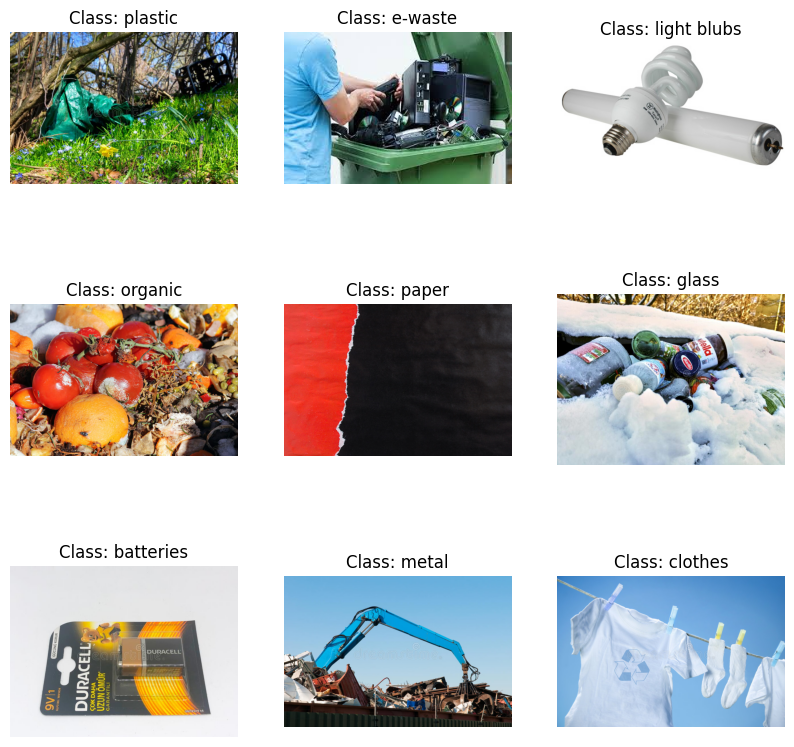

In [ ]:
#Importing Library

import os                         #listing files in a directory or creating directories.
import matplotlib.pyplot as plt   #visualization library--->creating various types of plots and charts
from PIL import Image             #way to open, manipulate, and save images.

# Get class names
class_names = os.listdir(train_ds)
print(f"Number of classes: {len(class_names)}")

# Count number of images per class in train_dir
class_counts = {}
for class_name in class_names:
    class_counts[class_name] = len(os.listdir(os.path.join(train_ds, class_name)))

# Display the number of images per class
print(f"Number of images per class: {min(class_counts.values())} - {max(class_counts.values())}")

# Display some samples from the dataset
plt.figure(figsize=(10, 10))
for i in range(len(class_names)):
    plt.subplot(3, 3, i + 1)
    img_class = class_names[i]
    img_dir = os.path.join(train_ds, img_class)
    img_name = os.listdir(img_dir)[0]
    img = Image.open(os.path.join(img_dir, img_name))
    plt.imshow(img)
    plt.title(f"Class: {img_class}")
    plt.axis("off")
plt.show()

# Check for imbalance in the dataset

This plot will show you what are the classes are balanced or near to each other , [plastic , paper] are not balance they are high from another classes --> we must have to delete some picture put we didn't

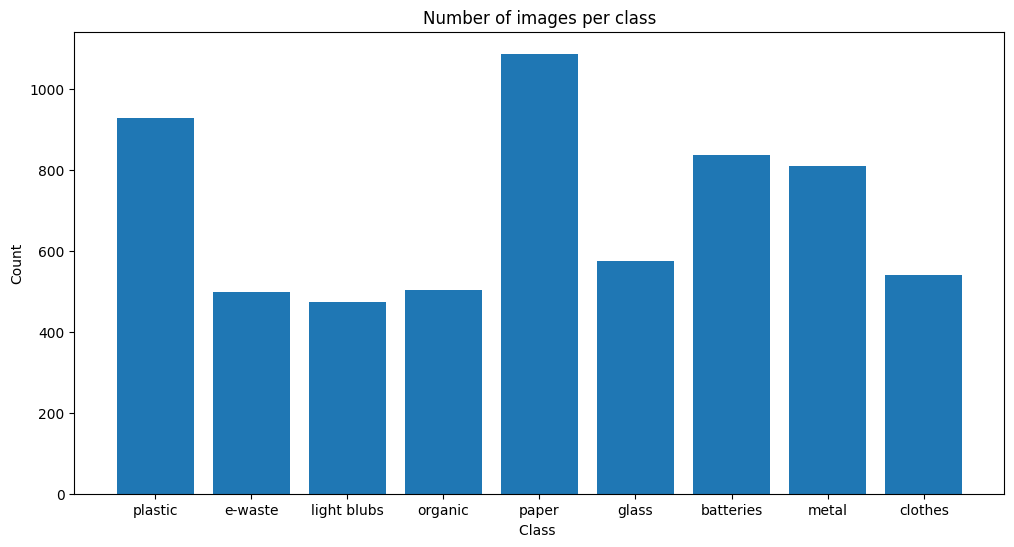

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Number of images per class')
plt.xlabel('Class ')
plt.ylabel('Count')
plt.show()

# Analyze image dimensions

In [ ]:
# cript that is intended to calculate statistics about the dimensions (size) of images stored in a directory structure.
# To know the min , max , avg of the classes

import numpy as np
image_dims = []

for class_name in class_names:
    img_dir = os.path.join(train_ds, class_name)
    for img_name in os.listdir(img_dir):
        img = Image.open(os.path.join(img_dir, img_name))
        image_dims.append(img.size)

# Convert to a numpy array and calculate stats
image_dims = np.array(image_dims)
print(f'Image dimensions: min={np.min(image_dims, axis=0)}, max={np.max(image_dims, axis=0)}, avg={np.mean(image_dims, axis=0)}')

Image dimensions: min=[100  81], max=[1920 2560], avg=[644.76814839 482.6301567 ]


# Buliding Model

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator  #--> To Generate the image

In [ ]:
# Define a data generator to handle data preprocessing and data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values to [0,1]
    shear_range=0.2,       # Randomly applies shearing transformation
    zoom_range=0.2,        # Randomly zooms in the image
    horizontal_flip=True)  # Randomly flips the image horizontally

test_datagen = ImageDataGenerator(rescale=1./255) # For validation/test data, only rescaling is needed

# Use the data generator to load data from directories
train_set = train_datagen.flow_from_directory(
    train_ds,
    shuffle=True,   # Change the index of the classes
    target_size=(64, 64),  # All images will be resized to 64x64
    batch_size=32,
    class_mode='categorical')   # Since we use categorical_crossentropy loss, we need categorical labels

val_set = test_datagen.flow_from_directory(
    val_ds,
    shuffle=True,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')    # --> Because we are having 9 classes

Found 6254 images belonging to 9 classes.
Found 2090 images belonging to 9 classes.


In [ ]:
# To know name of the classes in train , validation in order
names_train= os.listdir(train_ds)
names_val= os.listdir(val_ds)

print(names_train)
print(names_val)

['plastic', 'e-waste', 'light blubs', 'organic', 'paper', 'glass', 'batteries', 'metal', 'clothes']
['plastic', 'e-waste', 'light blubs', 'organic', 'paper', 'glass', 'batteries', 'metal', 'clothes']


In [ ]:
# Here is validation :
val_class_names= list(val_set.class_indices.keys())
val_class_names

['batteries',
 'clothes',
 'e-waste',
 'glass',
 'light blubs',
 'metal',
 'organic',
 'paper',
 'plastic']

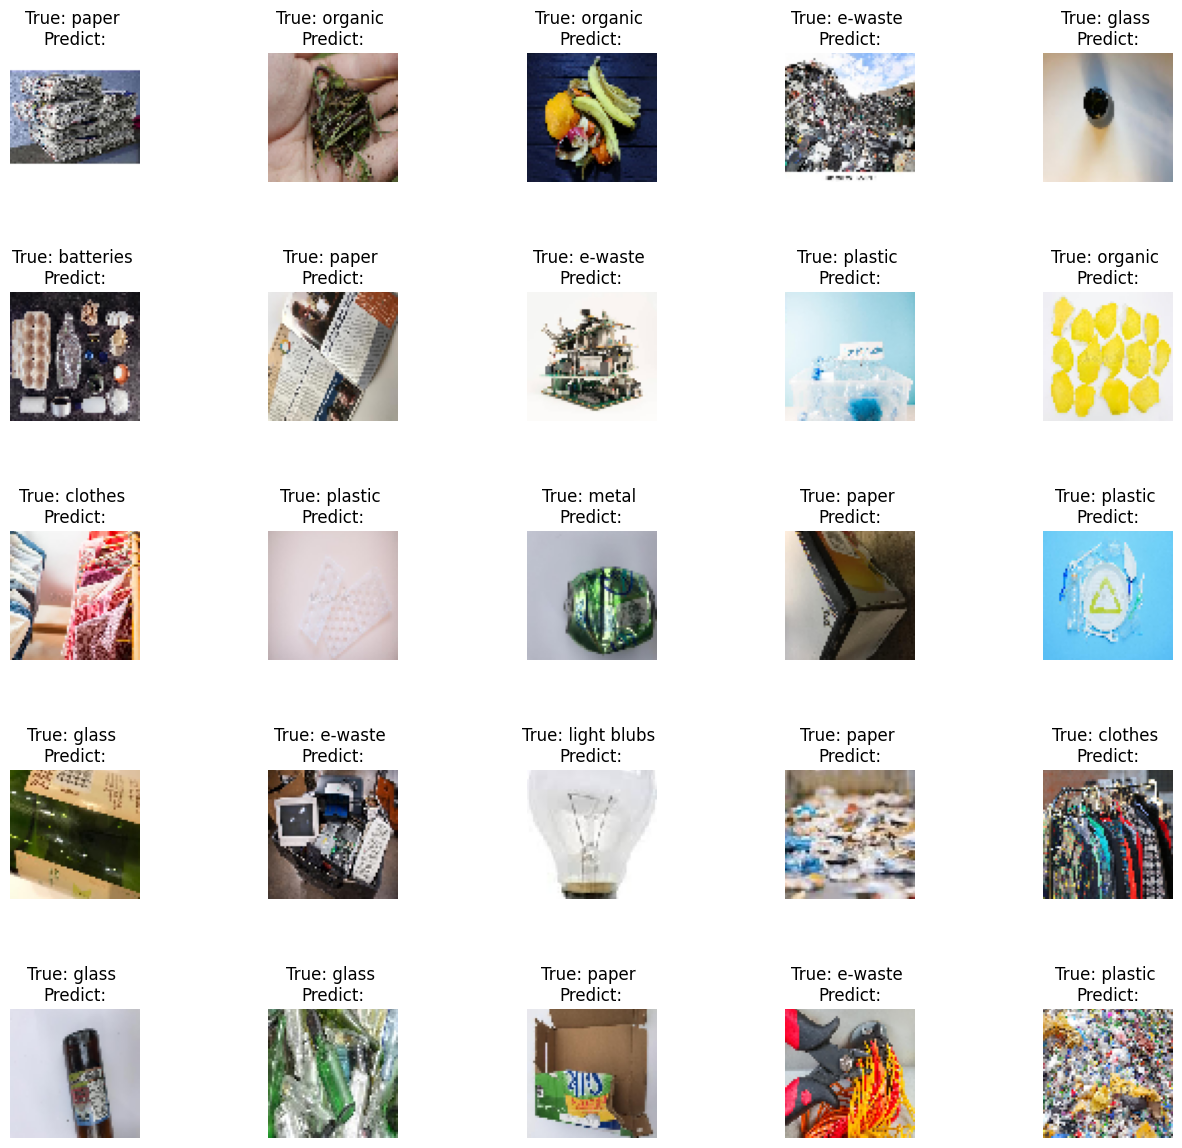

In [ ]:
# Get a batch of data from the validation set
x_val_sample, y_val_sample = next(iter(val_set))

# Make predictions on the sample
y_true_sample_classes= [val_class_names[np.argmax(x)] for x in y_val_sample]

# Plot the images, true labels, and predicted labels
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(x_val_sample[i])
    axes[i].set_title("True: {} \nPredict:".format( y_true_sample_classes[i]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

Check the picture by using [class_name , val_sample]

In [ ]:
class_names

['plastic',
 'e-waste',
 'light blubs',
 'organic',
 'paper',
 'glass',
 'batteries',
 'metal',
 'clothes']

In [ ]:
y_val_sample

array([[0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0.

In [ ]:
# See the length of the sample:
len(val_set)

66

In [ ]:
# Count each clasess:
class_counts

{'plastic': 928,
 'e-waste': 498,
 'light blubs': 474,
 'organic': 504,
 'paper': 1087,
 'glass': 574,
 'batteries': 838,
 'metal': 810,
 'clothes': 541}

# Simple CNN Model

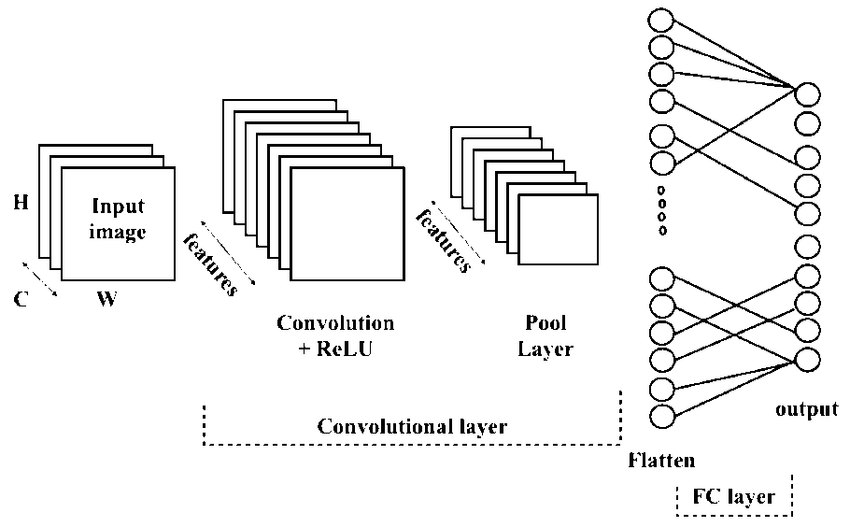

 **Input ➡️ Convolution ➡️ Flatten ➡️ Dense**

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
from keras import layers, models

In [ ]:
def build_simple_cnn():
    model = models.Sequential([

        # Input Layer: input images with shape 64x64 and 3 color channels (RGB)
        layers.Input(shape=(64, 64, 3)),

        # Convolution Block 1

        # Convolution Layer: 32 filters, 3x3 kernel, ReLU activation
        layers.Conv2D(32, 3, activation='relu'),
        # Batch Normalization: normalize activations to help training
        layers.BatchNormalization(),
        # Max Pooling: downsample the feature maps
        layers.MaxPooling2D(),

        # Convolution Block 2

        # Convolution Layer: 64 filters, 3x3 kernel, ReLU activation
        layers.Conv2D(64, 3, activation='relu'),
        # Batch Normalization
        layers.BatchNormalization(),
        # Max Pooling
        layers.MaxPooling2D(),

        # Flatten: convert 2D feature maps to 1D vector for Dense layers
        layers.Flatten(),

        # Dropout: randomly drop 50% of neurons to prevent overfitting
        layers.Dropout(0.5),

        # Fully Connected Layer (Dense): 128 neurons with ReLU activation
        layers.Dense(128, activation='relu'),

        # Output Layer: 9 neurons (for 9 classes) with softmax activation
        layers.Dense(9, activation='softmax')
    ])

    return model


In [ ]:
simplemodel = build_simple_cnn()

In [ ]:
simplemodel.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,697 (6.21 MB)

 Trainable params: 1,626,505 (6.20 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
from keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

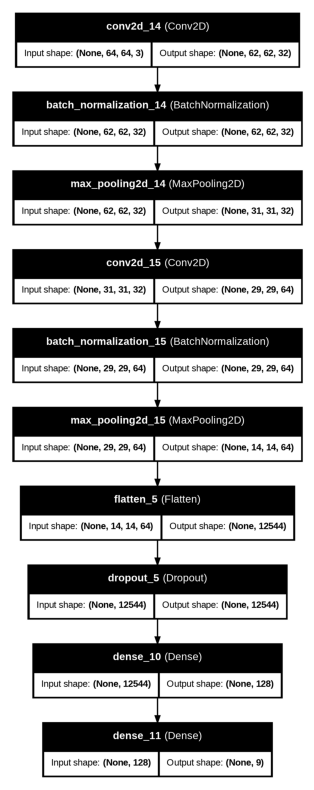

In [ ]:
# Plot the model
plot_model(simplemodel, show_shapes=True, show_layer_names=True, to_file='simple_cnn_architecture.png')

# Display the image
img = mpimg.imread('simple_cnn_architecture.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# Compile the model  ---> used to configure the training process for the model
simplemodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])   #categorical_crossentropy->Multi-class (One-Hot)

In [ ]:
# To let the model try training , Fit the model and save the history
history_simple_cnn= simplemodel.fit(train_set
          , epochs=10    #--> Who may time to train the model
          , verbose= 1   #-->  Sets the level of verbosity during training, with 1 indicating detailed progress updates.
          , validation_data=val_set  #--> Specifies the validation data to evaluate the model during training
                   )

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 95s 474ms/step - accuracy: 0.2170 - loss: 2.7588 - val_accuracy: 0.1914 - val_loss: 6.4848
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 92s 471ms/step - accuracy: 0.3181 - loss: 1.8834 - val_accuracy: 0.2990 - val_loss: 2.0139
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 96s 487ms/step - accuracy: 0.3497 - loss: 1.7663 - val_accuracy: 0.3593 - val_loss: 1.7960
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 88s 450ms/step - accuracy: 0.3706 - loss: 1.7000 - val_accuracy: 0.2627 - val_loss: 2.1242
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 85s 432ms/step - accuracy: 0.4185 - loss: 1.6138 - val_accuracy: 0.3053 - val_loss: 1.9903
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 140s 422ms/step - accuracy: 0.4259 - loss: 1.5582 - val_accuracy: 0.3593 - val_loss: 1.8646
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 147s 448ms/step - accuracy: 0.4647 - loss: 1.4912 - val_accuracy: 0.2656 - val_loss: 2.1133
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 83s 421ms/step - accuracy: 0.4657 - loss:

In [ ]:
# To Save the model without loading again :
# simplemodel.save('/content/drive/MyDrive/DL_PROJECT/recycling_waste_simple_model-v1.keras')
load_simple_cnn =tf.keras.models.load_model('/content/drive/MyDrive/DL_PROJECT/recycling_waste_simple_model-v1.keras')

In [ ]:
#make shore the model load
print(load_simple_cnn.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,879,709 (18.61 MB)

 Trainable params: 1,626,505 (6.20 MB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 3,253,012 (12.41 MB)

None


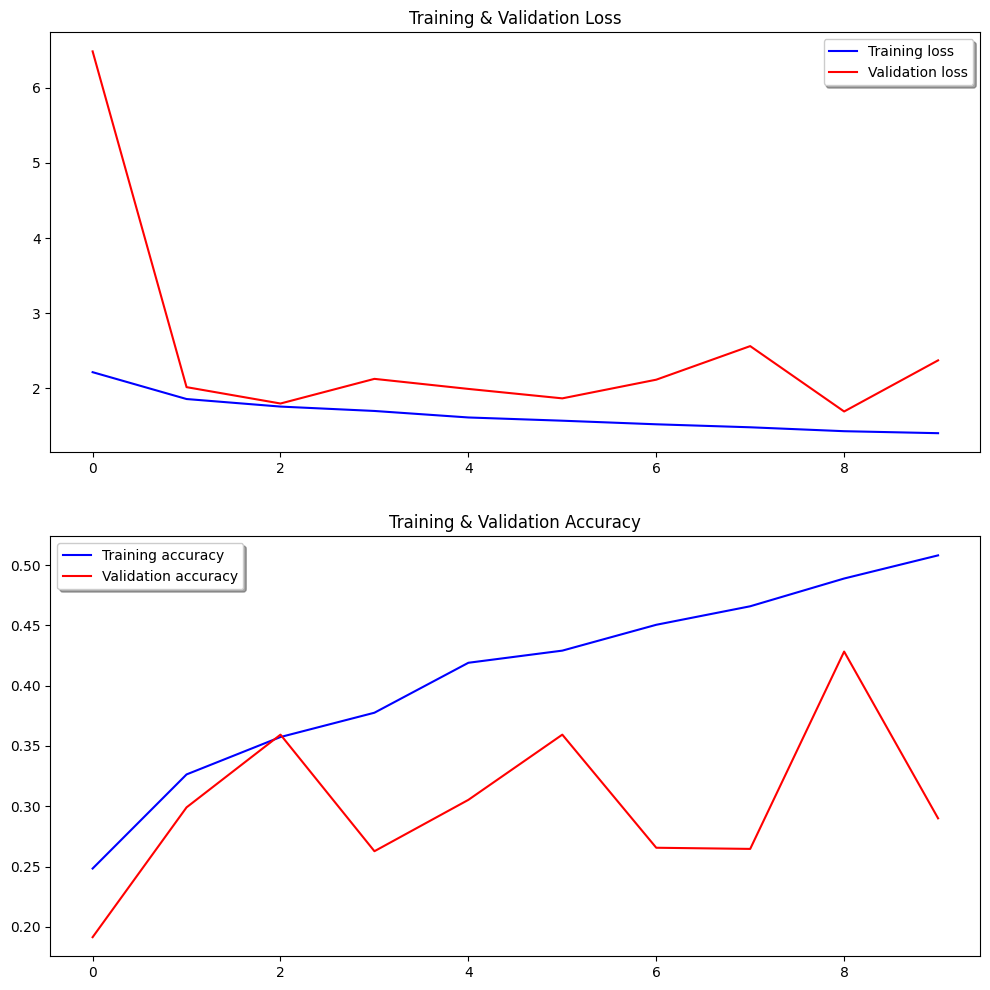

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Loss
ax[0].plot(history_simple_cnn.history['loss'], color='b', label="Training loss")
ax[0].plot(history_simple_cnn.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Training & Validation Loss')

# Accuracy
ax[1].plot(history_simple_cnn.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_simple_cnn.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Training & Validation Accuracy')

plt.show()


In [ ]:
# Get the model predictions
predictions = load_simple_cnn.predict(val_set)

66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 284ms/step


In [ ]:
# y_pred = [class_names[np.argmax(x)] for x in predictions]
y_pred = [np.argmax(x) for x in predictions]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


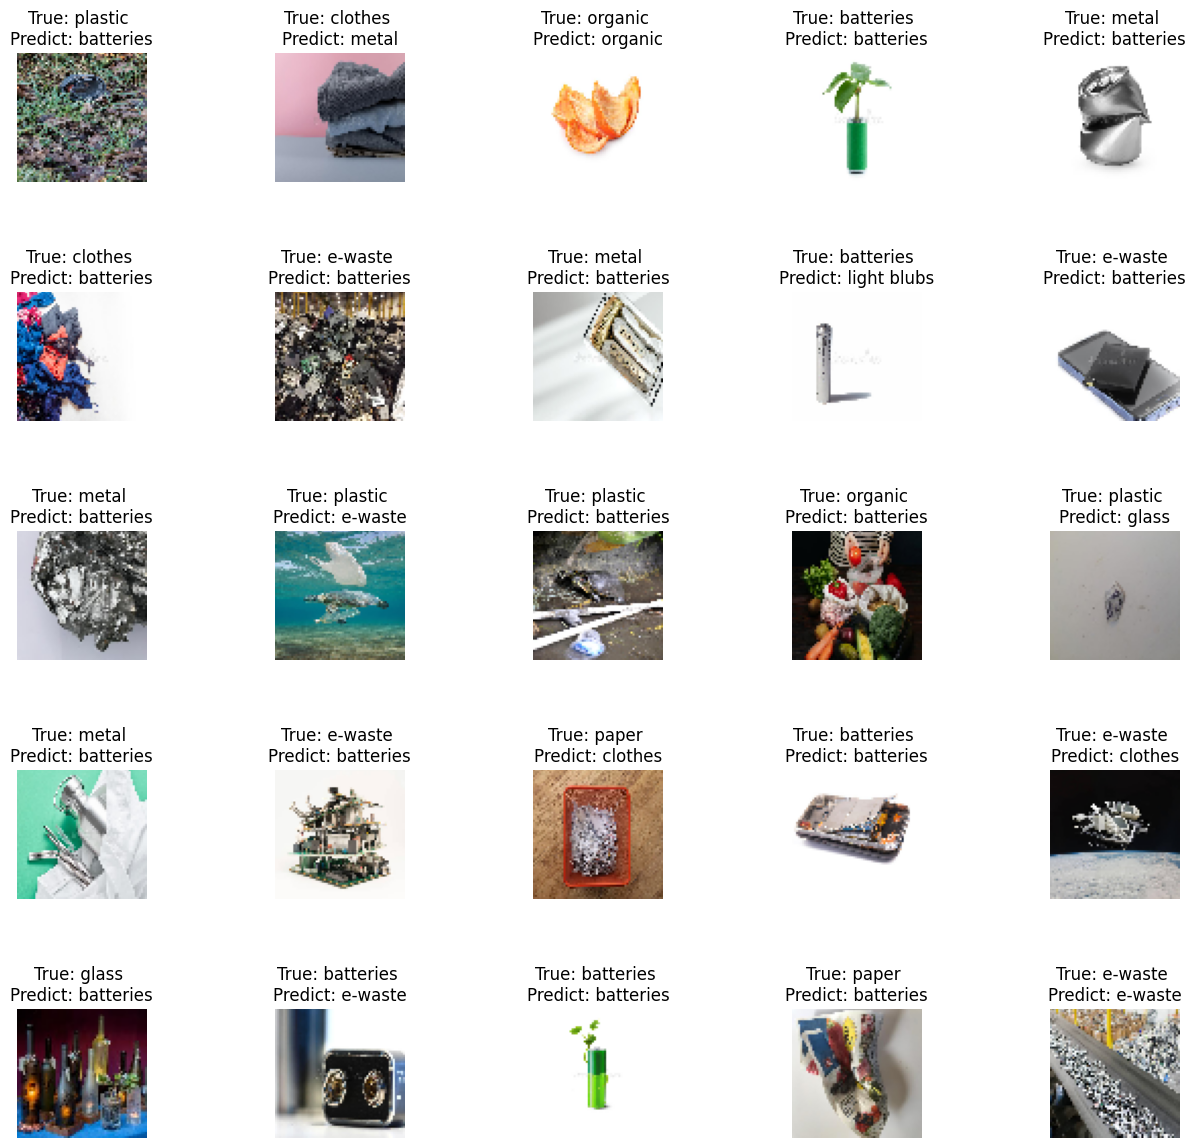

In [ ]:
# Get a batch of data from the validation set
x_val_sample, y_val_sample = next(iter(val_set))

# Make predictions on the sample
y_pred_sample = load_simple_cnn.predict(x_val_sample)
y_pred_sample_classes = [val_class_names[np.argmax(x)] for x in y_pred_sample]
y_true_sample_classes= [val_class_names[np.argmax(x)] for x in y_val_sample]

# Plot the images, true labels, and predicted labels
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(x_val_sample[i])
    axes[i].set_title("True: {} \nPredict: {}".format( y_true_sample_classes[i], y_pred_sample_classes[i]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# Deeper CNN

In [ ]:
def build_deeper_cnn():
    model = models.Sequential([

        # Block 1
        # Conv2D Layer: 32 filters, 3x3 kernel, ReLU activation, input shape (64,64,3)
        layers.Conv2D(32, 3, activation='relu', input_shape=(64, 64, 3)),
        # BatchNormalization: stabilize and speed up training
        layers.BatchNormalization(),
        # MaxPooling2D: reduce spatial size (downsampling)
        layers.MaxPooling2D(),

        #  Block 2
        # Conv2D Layer: 64 filters, 3x3 kernel, padding='same' to keep output size same as input
        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),

        # Block 3
        # Conv2D Layer: 128 filters, 3x3 kernel, same padding
        layers.Conv2D(128, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),

        # Block 4
        # Conv2D Layer: 256 filters, 3x3 kernel, same padding
        layers.Conv2D(256, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),

        # Flatten Layer: convert 2D feature maps to 1D vector
        layers.Flatten(),

        # Dropout Layer: drop 50% of neurons to prevent overfitting
        layers.Dropout(0.5),

        # Fully Connected Layer: 512 neurons with ReLU activation
        layers.Dense(512, activation='relu'),

        # Output Layer: 9 neurons (for 9 classes) with Softmax activation
        layers.Dense(9, activation='softmax')
    ])
    return model


In [ ]:
deepermodel = build_deeper_cnn()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
deepermodel.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 31, 31, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 15, 15, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,575,113 (6.01 MB)

 Trainable params: 1,574,153 (6.00 MB)

 Non-trainable params: 960 (3.75 KB)

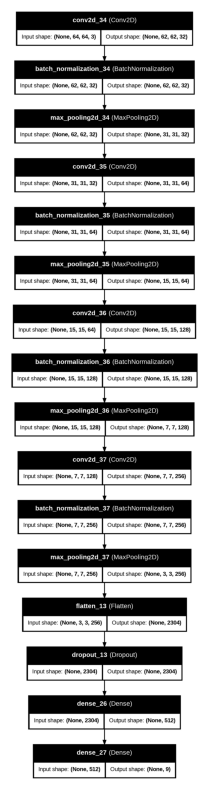

In [ ]:
# Plot the model
plot_model(deepermodel, show_shapes=True, show_layer_names=True, to_file='deepermodel_cnn_architecture.png')

# Display the image
img = mpimg.imread('deepermodel_cnn_architecture.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# Compile the model  ---> used to configure the training process for the model
deepermodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# To let the model try training , Fit the model and save the history
history_deep_cnn= deepermodel.fit(train_set
          , epochs=10    #--> Who may time to train the model
          , verbose= 1   #-->  Sets the level of verbosity during training, with 1 indicating detailed progress updates.
          , validation_data=val_set  #--> Specifies the validation data to evaluate the model during training
                   )

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 121s 599ms/step - accuracy: 0.2464 - loss: 3.2359 - val_accuracy: 0.1306 - val_loss: 5.4152
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 108s 549ms/step - accuracy: 0.3606 - loss: 1.7909 - val_accuracy: 0.2569 - val_loss: 2.3789
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 103s 526ms/step - accuracy: 0.4117 - loss: 1.6426 - val_accuracy: 0.4038 - val_loss: 1.6632
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 102s 520ms/step - accuracy: 0.4580 - loss: 1.5379 - val_accuracy: 0.3368 - val_loss: 1.9231
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 145s 538ms/step - accuracy: 0.4537 - loss: 1.5192 - val_accuracy: 0.3689 - val_loss: 1.7554
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 106s 538ms/step - accuracy: 0.4843 - loss: 1.4266 - val_accuracy: 0.3340 - val_loss: 2.0486
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 102s 518ms/step - accuracy: 0.5035 - loss: 1.3910 - val_accuracy: 0.2244 - val_loss: 3.0043
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 142s 519ms/step - accuracy: 0.5026 -

In [ ]:
# To Save the model without loading again :
# deepermodel.save('/content/drive/MyDrive/DL_PROJECT/recycling_waste_deep_model-v2.keras')
load_deep_cnn =tf.keras.models.load_model('/content/drive/MyDrive/DL_PROJECT/recycling_waste_deep_model-v2.keras')

In [ ]:
#make shore the model load
print(load_deep_cnn.summary())

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 31, 31, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 15, 15, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,723,421 (18.02 MB)

 Trainable params: 1,574,153 (6.00 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 3,148,308 (12.01 MB)

None


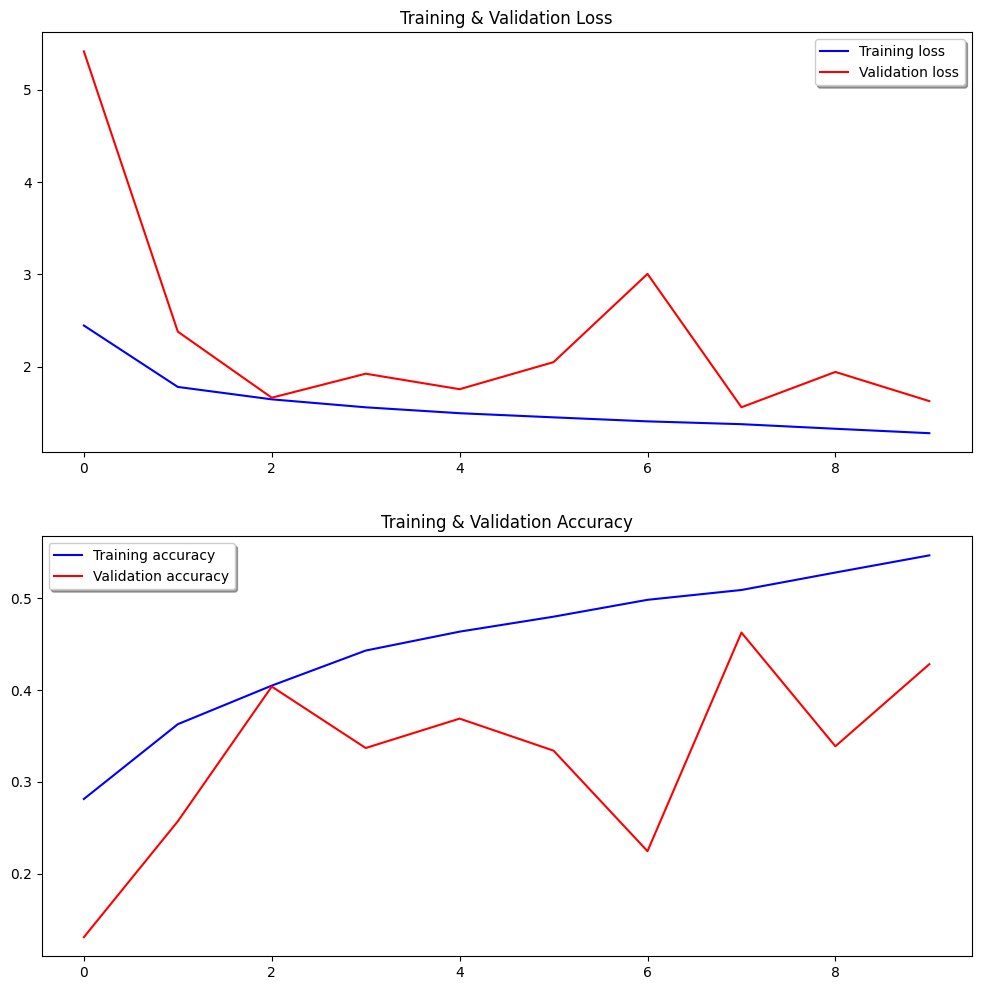

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Loss
ax[0].plot(history_deep_cnn.history['loss'], color='b', label="Training loss")
ax[0].plot(history_deep_cnn.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Training & Validation Loss')

# Accuracy
ax[1].plot(history_deep_cnn.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_deep_cnn.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Training & Validation Accuracy')

plt.show()


In [ ]:
# Get the model predictions
predictions = load_deep_cnn.predict(val_set)

66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 244ms/step


In [ ]:
# y_pred = [class_names[np.argmax(x)] for x in predictions]
y_pred = [np.argmax(x) for x in predictions]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


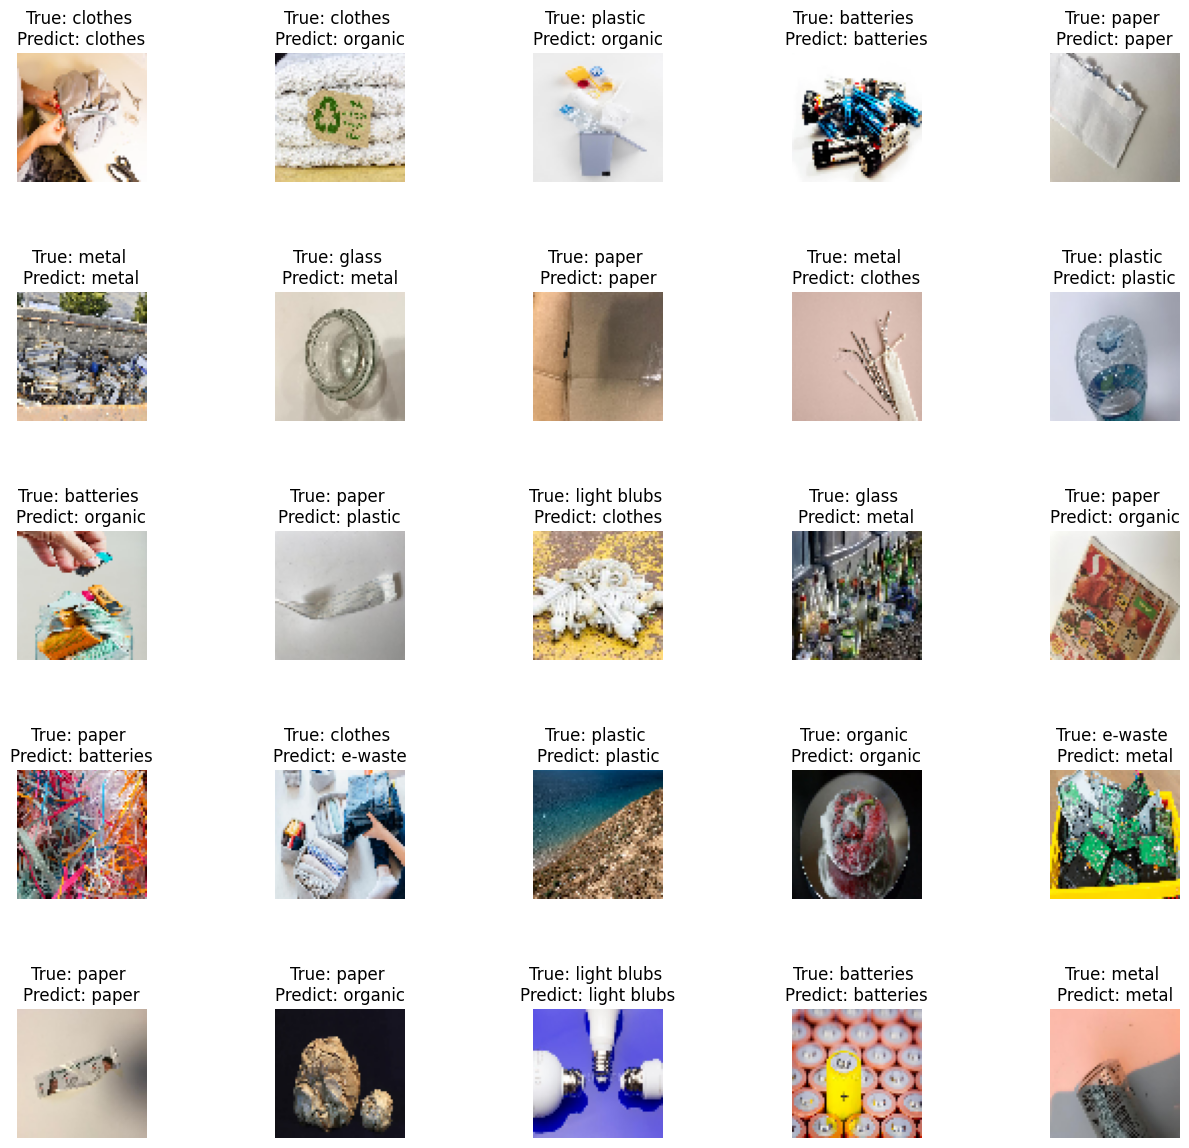

In [ ]:
# Get a batch of data from the validation set
x_val_sample, y_val_sample = next(iter(val_set))

# Make predictions on the sample
y_pred_sample = load_deep_cnn.predict(x_val_sample)
y_pred_sample_classes = [val_class_names[np.argmax(x)] for x in y_pred_sample]
y_true_sample_classes= [val_class_names[np.argmax(x)] for x in y_val_sample]

# Plot the images, true labels, and predicted labels
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(x_val_sample[i])
    axes[i].set_title("True: {} \nPredict: {}".format( y_true_sample_classes[i], y_pred_sample_classes[i]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# VGG CNN

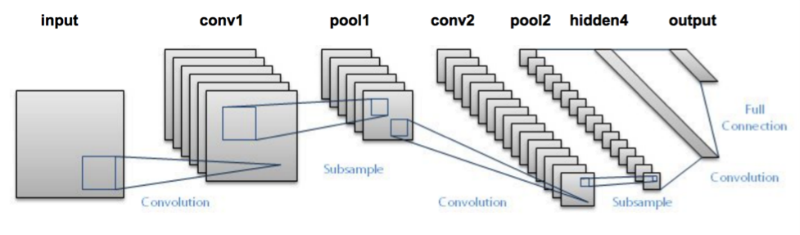

Input ➡️ Conv2D ➡️ Conv2D ➡️ MaxPooling ➡️ Conv2D ➡️ Conv2D ➡️ MaxPooling ➡️ Conv2D ➡️ Conv2D ➡️ MaxPooling ➡️ Conv2D ➡️ Conv2D ➡️ MaxPooling ➡️ Flatten ➡️ Dropout ➡️ Dense ➡️ Output











In the VGG architecture, we use two Conv2D layers in each block instead of one bigger layer.
This increases the depth, keeps the number of parameters low, and helps the network learn more complex features with better non-linearity.
It’s a simple but powerful idea to make the model stronger and more accurate

padding='same' to keep the image dimensions the same in each Convolution layer, and to prevent the feature map from shrinking too quickly.
This helps the model learn finer and more detailed features, especially when there are many layers and repeated blocks.”

In [ ]:
def build_vgg():
    model = models.Sequential([

        # Block 1
        # Conv2D layer with 64 filters, 3x3 kernel, ReLU activation, padding='same'
        # Input shape is (64, 64, 3) - RGB image
        layers.Conv2D(64, 3, activation='relu', padding='same', input_shape=(64, 64, 3)),
        layers.BatchNormalization(),  # Normalize activations to speed up training and improve stability
        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),  # Reduce spatial dimensions by taking max over regions

        # Block 2
        # Similar structure with 128 filters
        layers.Conv2D(128, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),

        # Block 3
        # 256 filters convolution layers
        layers.Conv2D(256, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(256, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),

        # Block 4
        # 512 filters convolution layers
        layers.Conv2D(512, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(512, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),

        # Flatten layer to convert 3D feature maps to 1D feature vector
        layers.Flatten(),

        # Dropout layer with 50% dropout rate to reduce overfitting
        layers.Dropout(0.5),

        # Fully connected Dense layer with 512 neurons and ReLU activation
        layers.Dense(512, activation='relu'),

        # Output layer with 9 neurons for 9 classes and softmax activation for classification
        layers.Dense(9, activation='softmax')
    ])
    return model


In [ ]:
vggmodel = build_vgg()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
vggmodel.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_54 (Conv2D)              │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_55          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_56          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_57          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_58          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_59          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 8192)           │             

 Total params: 8,892,489 (33.92 MB)

 Trainable params: 8,888,649 (33.91 MB)

 Non-trainable params: 3,840 (15.00 KB)

In [ ]:
# Compile the model  ---> used to configure the training process for the model
vggmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# To let the model try training , Fit the model and save the history
history_vgg_cnn= vggmodel.fit(train_set
          , epochs=10    #--> Who may time to train the model
          , verbose= 1   #-->  Sets the level of verbosity during training, with 1 indicating detailed progress updates.
          , validation_data=val_set  #--> Specifies the validation data to evaluate the model during training
                   )

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 694s 4s/step - accuracy: 0.2186 - loss: 3.8394 - val_accuracy: 0.1722 - val_loss: 3.2328
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 672s 3s/step - accuracy: 0.3257 - loss: 1.8646 - val_accuracy: 0.1584 - val_loss: 3.9580
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 733s 4s/step - accuracy: 0.3577 - loss: 1.7365 - val_accuracy: 0.2789 - val_loss: 1.9659
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 725s 4s/step - accuracy: 0.3921 - loss: 1.6785 - val_accuracy: 0.2976 - val_loss: 1.9381
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 732s 4s/step - accuracy: 0.4108 - loss: 1.6230 - val_accuracy: 0.2617 - val_loss: 2.1284
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 738s 4s/step - accuracy: 0.4259 - loss: 1.5937 - val_accuracy: 0.3187 - val_loss: 2.0093
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 707s 4s/step - accuracy: 0.4442 - loss: 1.5485 - val_accuracy: 0.3033 - val_loss: 2.1639
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 770s 4s/step - accuracy: 0.4692 - loss: 1.5029 - val_accu

In [ ]:
# To Save the model without loading again :
# vggmodel.save('/content/drive/MyDrive/DL_PROJECT/recycling_waste_vgg_model-v3.keras')
load_vgg_cnn =tf.keras.models.load_model('/content/drive/MyDrive/DL_PROJECT/recycling_waste_vgg_model-v3.keras')

In [ ]:
#make shore the model load
print(load_vgg_cnn.summary())

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_54 (Conv2D)              │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_55          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_56          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_57          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_58          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_59          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 8192)           │             

 Total params: 26,669,789 (101.74 MB)

 Trainable params: 8,888,649 (33.91 MB)

 Non-trainable params: 3,840 (15.00 KB)

 Optimizer params: 17,777,300 (67.82 MB)

None


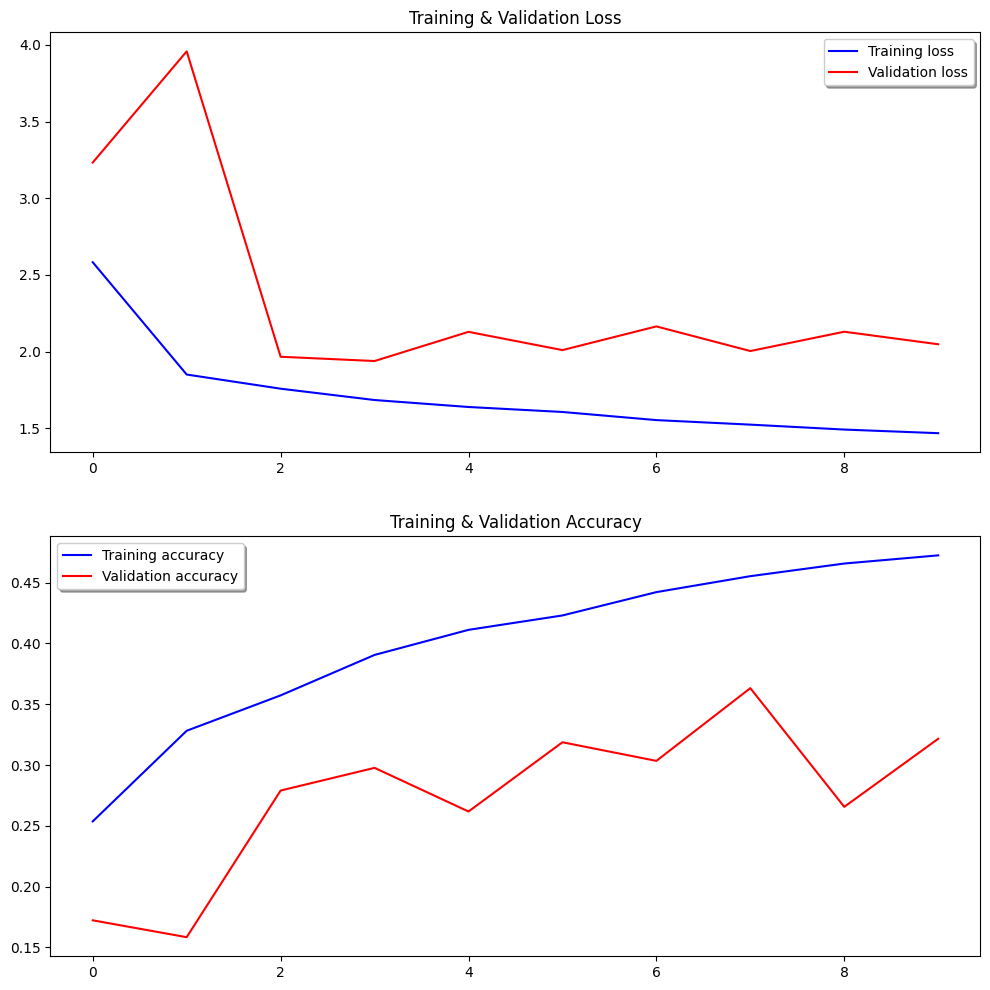

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Loss
ax[0].plot(history_vgg_cnn.history['loss'], color='b', label="Training loss")
ax[0].plot(history_vgg_cnn.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Training & Validation Loss')

# Accuracy
ax[1].plot(history_vgg_cnn.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_vgg_cnn.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Training & Validation Accuracy')

plt.show()


In [ ]:
# Get the model predictions
predictions = load_vgg_cnn.predict(val_set)

66/66 ━━━━━━━━━━━━━━━━━━━━ 58s 873ms/step


In [ ]:
# y_pred = [class_names[np.argmax(x)] for x in predictions]
y_pred = [np.argmax(x) for x in predictions]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 946ms/step


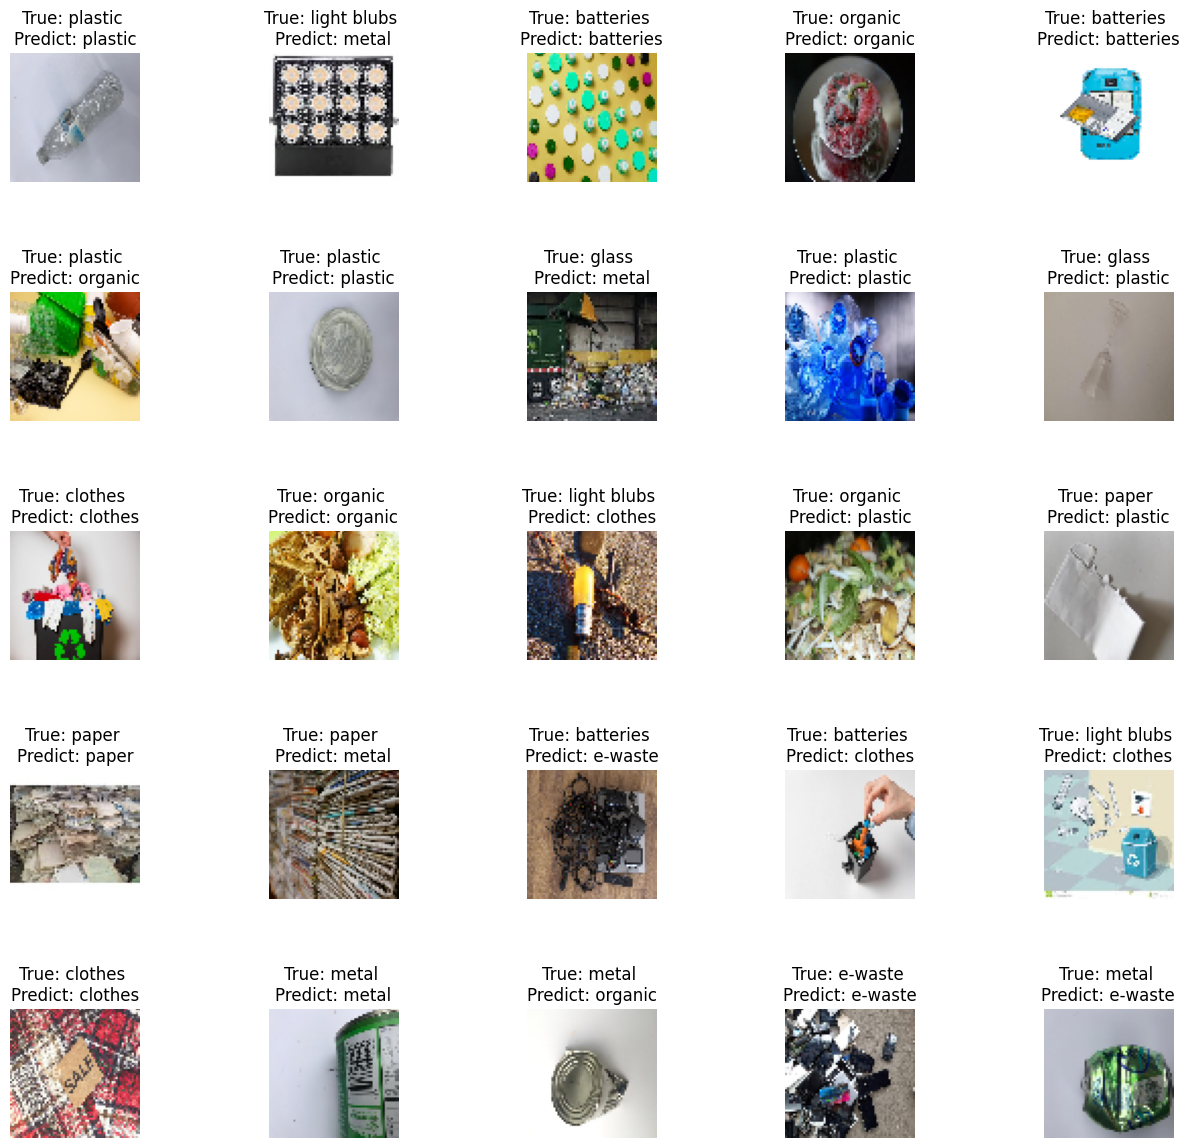

In [ ]:
# Get a batch of data from the validation set
x_val_sample, y_val_sample = next(iter(val_set))

# Make predictions on the sample
y_pred_sample = load_vgg_cnn.predict(x_val_sample)
y_pred_sample_classes = [val_class_names[np.argmax(x)] for x in y_pred_sample]
y_true_sample_classes= [val_class_names[np.argmax(x)] for x in y_val_sample]

# Plot the images, true labels, and predicted labels
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(x_val_sample[i])
    axes[i].set_title("True: {} \nPredict: {}".format( y_true_sample_classes[i], y_pred_sample_classes[i]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# ResNet CNN

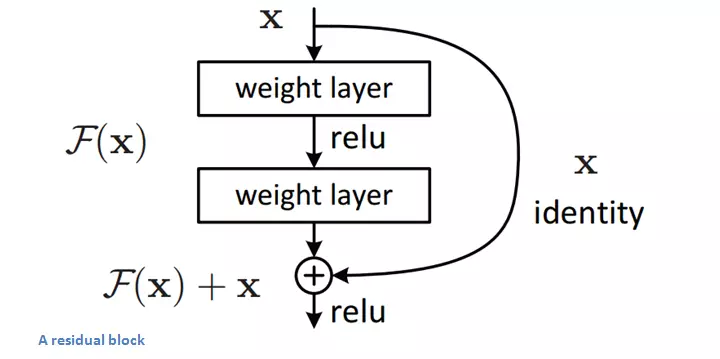

Input ➡️ Conv2D ➡️ BatchNorm ➡️ Residual Block ➡️ MaxPooling ➡️ Conv2D ➡️ Residual Block ➡️ MaxPooling ➡️ Flatten ➡️ Dropout ➡️ Dense ➡️ Output.

In [ ]:
def build_resnet():
    # Input layer: takes an image of shape 64x64 with 3 color channels (RGB)
    inputs = layers.Input(shape=(64, 64, 3))

    # First Convolution Block
    # Conv2D: 32 filters, 3x3 kernel, padding='same' keeps output size same, ReLU activation
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)  # Normalize to improve training stability

    # Residual Branch
    # Another Conv2D layer with 32 filters
    y = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
    y = layers.BatchNormalization()(y)

    # Skip Connection: Add input (x) and branch output (y)
    # This forms the residual block
    x = layers.add([x, y])

    # Downsampling: MaxPooling to reduce spatial dimensions
    x = layers.MaxPooling2D()(x)

    # Second Convolution Block
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Residual Branch for second block
    y = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    y = layers.BatchNormalization()(y)

    # Skip Connection for second block
    x = layers.add([x, y])

    # MaxPooling to downsample again
    x = layers.MaxPooling2D()(x)

    # Flatten the 2D feature maps to a 1D vector
    x = layers.Flatten()(x)

    # Dropout layer: drops 50% of neurons randomly to prevent overfitting
    x = layers.Dropout(0.5)(x)

    # Dense layer: 128 neurons with ReLU activation for learning complex patterns
    x = layers.Dense(128, activation='relu')(x)

    # Output layer: 9 neurons for 9 classes, Softmax activation for multi-class classification
    outputs = layers.Dense(9, activation='softmax')(x)

    # Build the ResNet model
    model = models.Model(inputs, outputs)
    return model


In [ ]:
ResNetmodel = build_resnet()

In [ ]:
ResNetmodel.summary()

Model: "functional_67"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_62 (Conv2D)  │ (None, 64, 64,    │        896 │ input_layer_17[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_62[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_63 (Conv2D)  │ (None, 64, 64,    │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_63[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_50    │ (None, 32, 32,    │          0 │ add[0][0]         │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_64 (Conv2D)  │ (None, 32, 32,    │     18,496 │ max_pooling2d_50… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_64[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_65 (Conv2D)  │ (None, 32, 32,    │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_65[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_51    │ (None, 16, 16,    │          0 │ add_1[0][0]       │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_17          │ (None, 16384)     │          0 │ max_pooling2d_51… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_17          │ (None, 16384)     │          0 │ flatten_17[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_34 (Dense)    │ (None, 128)       │  2,097,280 │ dropout_17[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_35 (Dense)    │ (None, 9)         │      1,161 │ dense_34[0][0]    │
└─────────────────────┴───────────────────┴────────────┴─────────────────

 Total params: 2,164,777 (8.26 MB)

 Trainable params: 2,164,393 (8.26 MB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DL_PROJECT/best_ResNet_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1, min_lr=1e-6)

# Compile
ResNetmodel.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fit
history_ResNet_cnn = ResNetmodel.fit(
    train_set,
    epochs=30,
    verbose=1,
    validation_data=val_set,
    callbacks=[early_stop, checkpoint, lr_reduce]
)


Epoch 1/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 705ms/step - accuracy: 0.2235 - loss: 2.8885
Epoch 1: val_loss improved from inf to 7.76991, saving model to /content/drive/MyDrive/DL_PROJECT/best_ResNet_model.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 165s 821ms/step - accuracy: 0.2236 - loss: 2.8855 - val_accuracy: 0.1799 - val_loss: 7.7699 - learning_rate: 1.0000e-04
Epoch 2/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - accuracy: 0.3041 - loss: 1.8728
Epoch 2: val_loss improved from 7.76991 to 2.53665, saving model to /content/drive/MyDrive/DL_PROJECT/best_ResNet_model.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 190s 759ms/step - accuracy: 0.3042 - loss: 1.8727 - val_accuracy: 0.2742 - val_loss: 2.5366 - learning_rate: 1.0000e-04
Epoch 3/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 662ms/step - accuracy: 0.3518 - loss: 1.7645
Epoch 3: val_loss improved from 2.53665 to 1.70021, saving model to /content/drive/MyDrive/DL_PROJECT/best_ResNet_model.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 202s 759ms/step - accuracy: 0.3519 

In [ ]:
# To Save the model without loading again :
# ResNetmodel.save('/content/drive/MyDrive/DL_PROJECT/recycling_waste_resnet_model-v4.keras')
load_ResNet_cnn =tf.keras.models.load_model('/content/drive/MyDrive/DL_PROJECT/recycling_waste_resnet_model-v4.keras')

In [ ]:
#make shore the model load
print(load_ResNet_cnn.summary())

Model: "functional_67"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_62 (Conv2D)  │ (None, 64, 64,    │        896 │ input_layer_17[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_62[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_63 (Conv2D)  │ (None, 64, 64,    │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_63[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_50    │ (None, 32, 32,    │          0 │ add[0][0]         │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_64 (Conv2D)  │ (None, 32, 32,    │     18,496 │ max_pooling2d_50… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_64[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_65 (Conv2D)  │ (None, 32, 32,    │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_65[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_51    │ (None, 16, 16,    │          0 │ add_1[0][0]       │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_17          │ (None, 16384)     │          0 │ max_pooling2d_51… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_17          │ (None, 16384)     │          0 │ flatten_17[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_34 (Dense)    │ (None, 128)       │  2,097,280 │ dropout_17[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_35 (Dense)    │ (None, 9)         │      1,161 │ dense_34[0][0]    │
└─────────────────────┴───────────────────┴────────────┴─────────────────

 Total params: 6,493,565 (24.77 MB)

 Trainable params: 2,164,393 (8.26 MB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 4,328,788 (16.51 MB)

None


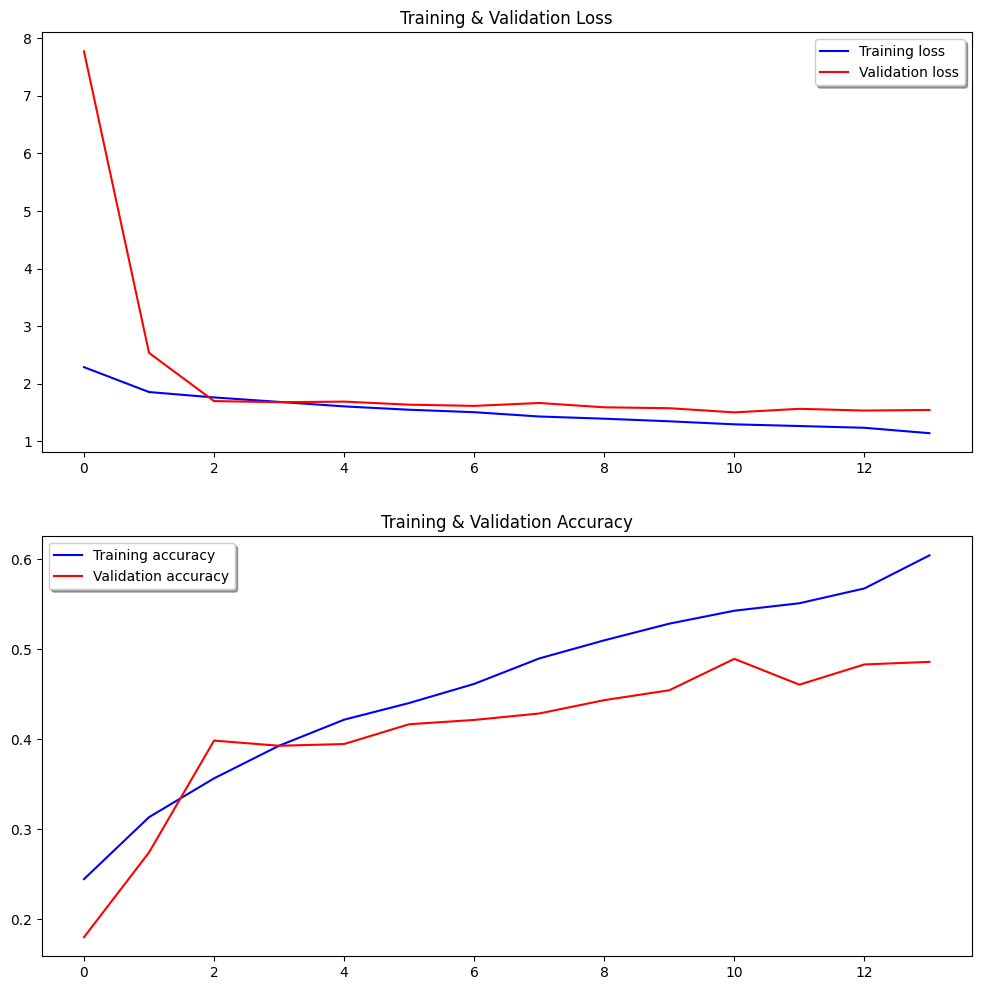

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Loss
ax[0].plot(history_ResNet_cnn.history['loss'], color='b', label="Training loss")
ax[0].plot(history_ResNet_cnn.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Training & Validation Loss')

# Accuracy
ax[1].plot(history_ResNet_cnn.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_ResNet_cnn.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Training & Validation Accuracy')

plt.show()

In [ ]:
# Get the model predictions
predictions = load_ResNet_cnn.predict(val_set)

66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 332ms/step


In [ ]:
# y_pred = [class_names[np.argmax(x)] for x in predictions]
y_pred = [np.argmax(x) for x in predictions]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


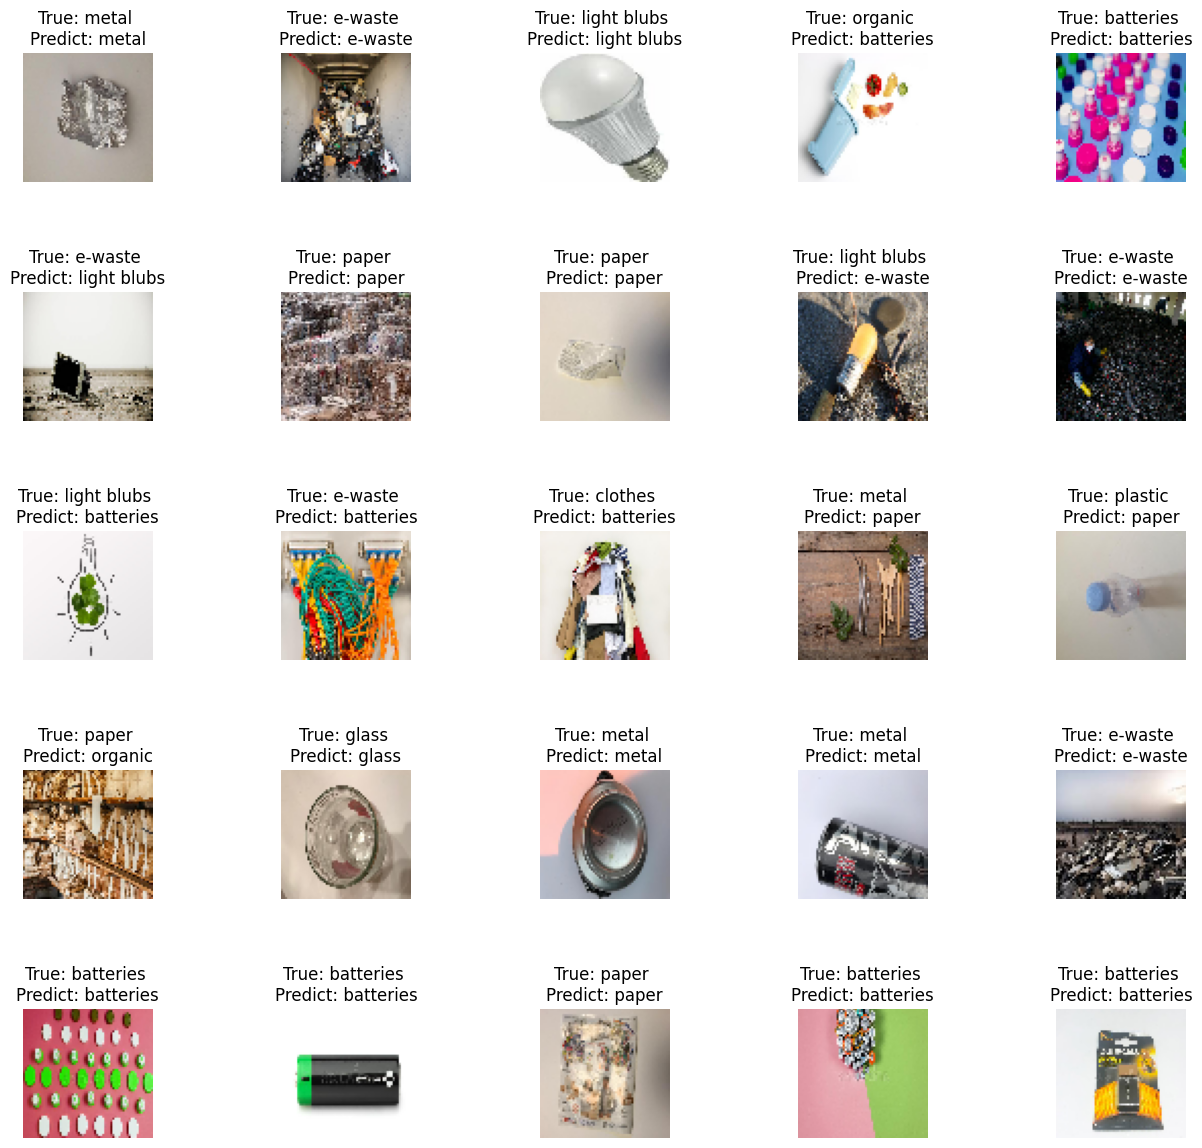

In [ ]:
# Get a batch of data from the validation set
x_val_sample, y_val_sample = next(iter(val_set))

# Make predictions on the sample
y_pred_sample = load_ResNet_cnn.predict(x_val_sample)
y_pred_sample_classes = [val_class_names[np.argmax(x)] for x in y_pred_sample]
y_true_sample_classes= [val_class_names[np.argmax(x)] for x in y_val_sample]

# Plot the images, true labels, and predicted labels
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(x_val_sample[i])
    axes[i].set_title("True: {} \nPredict: {}".format( y_true_sample_classes[i], y_pred_sample_classes[i]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# Inception model(GoogLeNet)

In [ ]:
def inception_module(x, filters):
    #block (input feature map)
    path1 = layers.Conv2D(filters, 1, padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters, 5, padding='same', activation='relu')(x)
    path4 = layers.MaxPooling2D(3, strides=1, padding='same')(x)
    path4 = layers.Conv2D(filters, 1, padding='same', activation='relu')(path4)
    return layers.concatenate([path1, path2, path3, path4], axis=-1)

def build_inception():
    inputs = layers.Input(shape=(64, 64,3))
    #block 1
    x = inception_module(inputs, 32)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)
    #block 2
    x = inception_module(x, 64)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.6)(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(9, activation='softmax')(x)
    model = models.Model(inputs, outputs)
    return model

In [ ]:
GoogleNetmodel = build_inception()

In [ ]:
GoogleNetmodel.summary()

Model: "functional_70"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_20      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_60    │ (None, 64, 64, 3) │          0 │ input_layer_20[0… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_82 (Conv2D)  │ (None, 64, 64,    │        128 │ input_layer_20[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_83 (Conv2D)  │ (None, 64, 64,    │        896 │ input_layer_20[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_84 (Conv2D)  │ (None, 64, 64,    │      2,432 │ input_layer_20[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_85 (Conv2D)  │ (None, 64, 64,    │        128 │ max_pooling2d_60… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 64, 64,    │          0 │ conv2d_82[0][0],  │
│ (Concatenate)       │ 128)              │            │ conv2d_83[0][0],  │
│                     │                   │            │ conv2d_84[0][0],  │
│                     │                   │            │ conv2d_85[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ concatenate_4[0]… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_61    │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_62    │ (None, 32, 32,    │          0 │ max_pooling2d_61… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_86 (Conv2D)  │ (None, 32, 32,    │      8,256 │ max_pooling2d_61… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_87 (Conv2D)  │ (None, 32, 32,    │     73,792 │ max_pooling2d_61… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_88 (Conv2D)  │ (None, 32, 32,    │    204,864 │ max_pooling2d_61… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_89 (Conv2D)  │ (None, 32, 32,    │      8,256 │ max_pooling2d_62… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 32, 32,    │          0 │ conv2d_86[0][0],  │
│ (Concatenate)       │ 256)              │            │ conv2d_87[0][0],  │
│                     │                   │            │ conv2d_88[0][0],  │
│                     │                   │            │ conv2d_89[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 8,690,185 (33.15 MB)

 Trainable params: 8,689,417 (33.15 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DL_PROJECT/best_GoogleNet_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1, min_lr=1e-6)

# Compile
GoogleNetmodel.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fit
history_GoogleNet_cnn = GoogleNetmodel.fit(
    train_set,
    epochs=30,
    verbose=1,
    validation_data=val_set,
    callbacks=[early_stop, checkpoint, lr_reduce]
)


Epoch 1/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2025 - loss: 3.9398
Epoch 1: val_loss improved from inf to 11.66543, saving model to /content/drive/MyDrive/DL_PROJECT/best_GoogleNet_model.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 449s 2s/step - accuracy: 0.2027 - loss: 3.9329 - val_accuracy: 0.1191 - val_loss: 11.6654 - learning_rate: 5.0000e-04
Epoch 2/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2568 - loss: 1.9854
Epoch 2: val_loss improved from 11.66543 to 3.19025, saving model to /content/drive/MyDrive/DL_PROJECT/best_GoogleNet_model.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 446s 2s/step - accuracy: 0.2568 - loss: 1.9853 - val_accuracy: 0.1952 - val_loss: 3.1902 - learning_rate: 5.0000e-04
Epoch 3/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2718 - loss: 1.9337
Epoch 3: val_loss improved from 3.19025 to 1.97826, saving model to /content/drive/MyDrive/DL_PROJECT/best_GoogleNet_model.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 453s 2s/step - accuracy: 0.2718 - loss

In [ ]:
# To Save the model without loading again :
# GoogleNetmodel.save('/content/drive/MyDrive/DL_PROJECT/recycling_waste_googlenet_model-v5.keras')
load_googlenet_cnn =tf.keras.models.load_model('/content/drive/MyDrive/DL_PROJECT/recycling_waste_googlenet_model-v5.keras')

In [ ]:
#make shore the model load
print(load_googlenet_cnn.summary())

Model: "functional_70"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_20      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_60    │ (None, 64, 64, 3) │          0 │ input_layer_20[0… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_82 (Conv2D)  │ (None, 64, 64,    │        128 │ input_layer_20[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_83 (Conv2D)  │ (None, 64, 64,    │        896 │ input_layer_20[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_84 (Conv2D)  │ (None, 64, 64,    │      2,432 │ input_layer_20[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_85 (Conv2D)  │ (None, 64, 64,    │        128 │ max_pooling2d_60… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 64, 64,    │          0 │ conv2d_82[0][0],  │
│ (Concatenate)       │ 128)              │            │ conv2d_83[0][0],  │
│                     │                   │            │ conv2d_84[0][0],  │
│                     │                   │            │ conv2d_85[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ concatenate_4[0]… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_61    │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_62    │ (None, 32, 32,    │          0 │ max_pooling2d_61… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_86 (Conv2D)  │ (None, 32, 32,    │      8,256 │ max_pooling2d_61… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_87 (Conv2D)  │ (None, 32, 32,    │     73,792 │ max_pooling2d_61… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_88 (Conv2D)  │ (None, 32, 32,    │    204,864 │ max_pooling2d_61… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_89 (Conv2D)  │ (None, 32, 32,    │      8,256 │ max_pooling2d_62… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 32, 32,    │          0 │ conv2d_86[0][0],  │
│ (Concatenate)       │ 256)              │            │ conv2d_87[0][0],  │
│                     │                   │            │ conv2d_88[0][0],  │
│                     │                   │            │ conv2d_89[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 26,069,021 (99.45 MB)

 Trainable params: 8,689,417 (33.15 MB)

 Non-trainable params: 768 (3.00 KB)

 Optimizer params: 17,378,836 (66.30 MB)

None


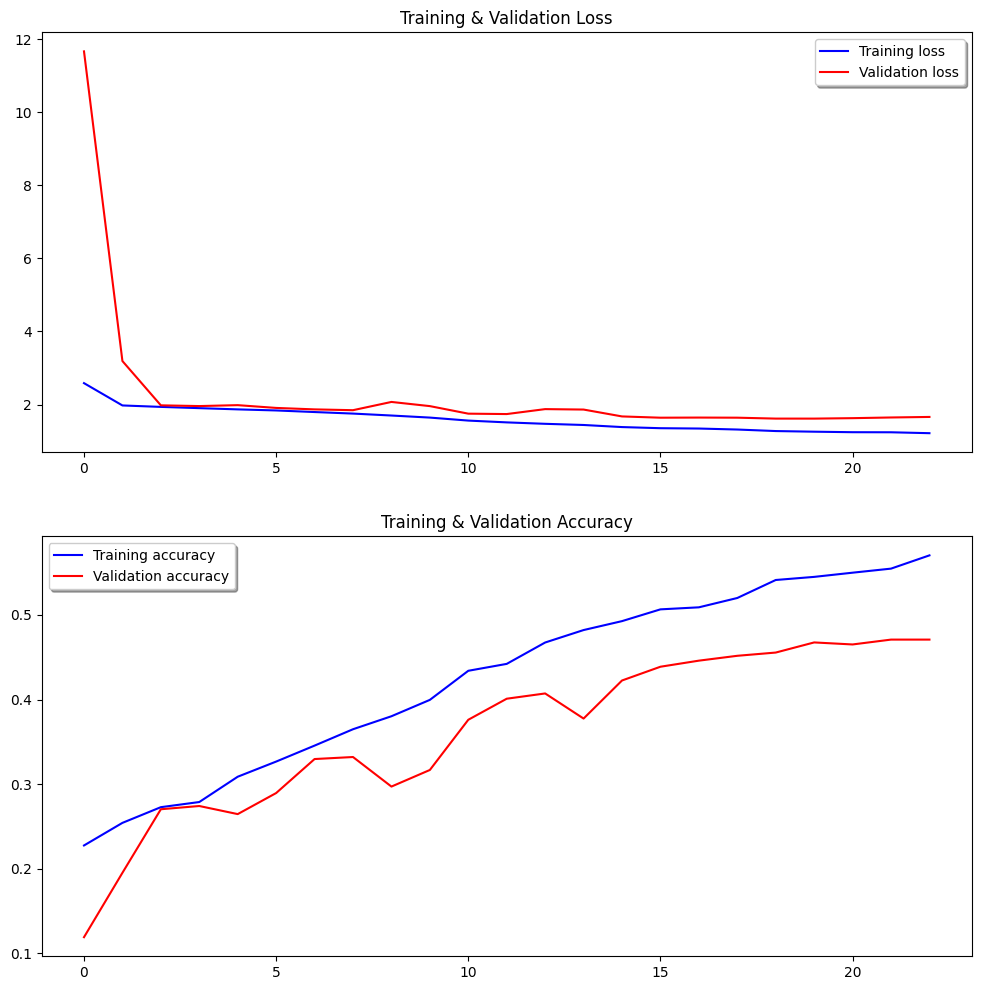

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Loss
ax[0].plot(history_GoogleNet_cnn.history['loss'], color='b', label="Training loss")
ax[0].plot(history_GoogleNet_cnn.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Training & Validation Loss')

# Accuracy
ax[1].plot(history_GoogleNet_cnn.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_GoogleNet_cnn.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Training & Validation Accuracy')

plt.show()

In [ ]:
# Get the model predictions
predictions = load_googlenet_cnn.predict(val_set)

66/66 ━━━━━━━━━━━━━━━━━━━━ 34s 514ms/step


In [ ]:
# y_pred = [class_names[np.argmax(x)] for x in predictions]
y_pred = [np.argmax(x) for x in predictions]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


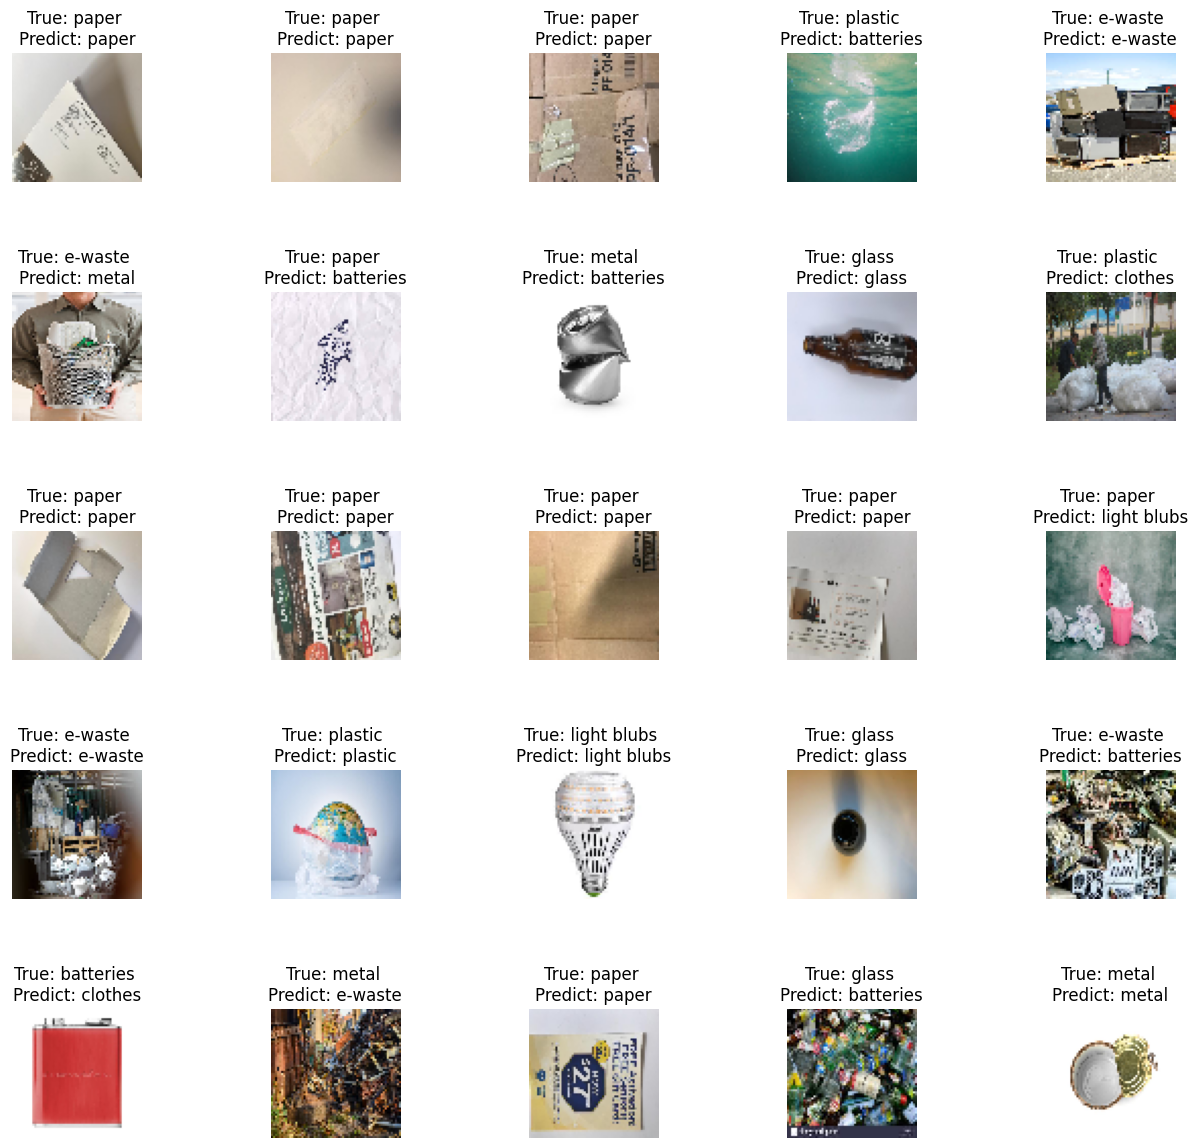

In [ ]:
# Get a batch of data from the validation set
x_val_sample, y_val_sample = next(iter(val_set))

# Make predictions on the sample
y_pred_sample = load_googlenet_cnn.predict(x_val_sample)
y_pred_sample_classes = [val_class_names[np.argmax(x)] for x in y_pred_sample]
y_true_sample_classes= [val_class_names[np.argmax(x)] for x in y_val_sample]

# Plot the images, true labels, and predicted labels
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(x_val_sample[i])
    axes[i].set_title("True: {} \nPredict: {}".format( y_true_sample_classes[i], y_pred_sample_classes[i]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DL_PROJECT/best_GoogleNet_model_v2.keras',
                             monitor='val_loss', save_best_only=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1, min_lr=1e-7)


load_googlenet_cnn.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_GoogleNet_cnn = load_googlenet_cnn.fit(
    train_set,
    epochs=25,
    verbose=1,
    validation_data=val_set,
    callbacks=[early_stop, checkpoint, lr_reduce]
)


Epoch 1/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5559 - loss: 1.2356
Epoch 1: val_loss improved from inf to 1.69469, saving model to /content/drive/MyDrive/DL_PROJECT/best_GoogleNet_model_v2.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 440s 2s/step - accuracy: 0.5559 - loss: 1.2357 - val_accuracy: 0.4584 - val_loss: 1.6947 - learning_rate: 1.0000e-04
Epoch 2/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5661 - loss: 1.2243
Epoch 2: val_loss improved from 1.69469 to 1.64306, saving model to /content/drive/MyDrive/DL_PROJECT/best_GoogleNet_model_v2.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.5661 - loss: 1.2244 - val_accuracy: 0.4684 - val_loss: 1.6431 - learning_rate: 1.0000e-04
Epoch 3/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5621 - loss: 1.2311
Epoch 3: val_loss improved from 1.64306 to 1.62055, saving model to /content/drive/MyDrive/DL_PROJECT/best_GoogleNet_model_v2.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 433s 2s/step - accuracy: 0.5621 

# Evaluating Multiple CNN Architectures

In [ ]:
histories = {
    'SimpleCNN': history_simple_cnn,
    'DeepCNN':history_deep_cnn,
    'VGG': history_vgg_cnn,
    'ResNet': history_ResNet_cnn,
    'GoogleNet': history_GoogleNet_cnn
}

In [ ]:
import matplotlib.pyplot as plt

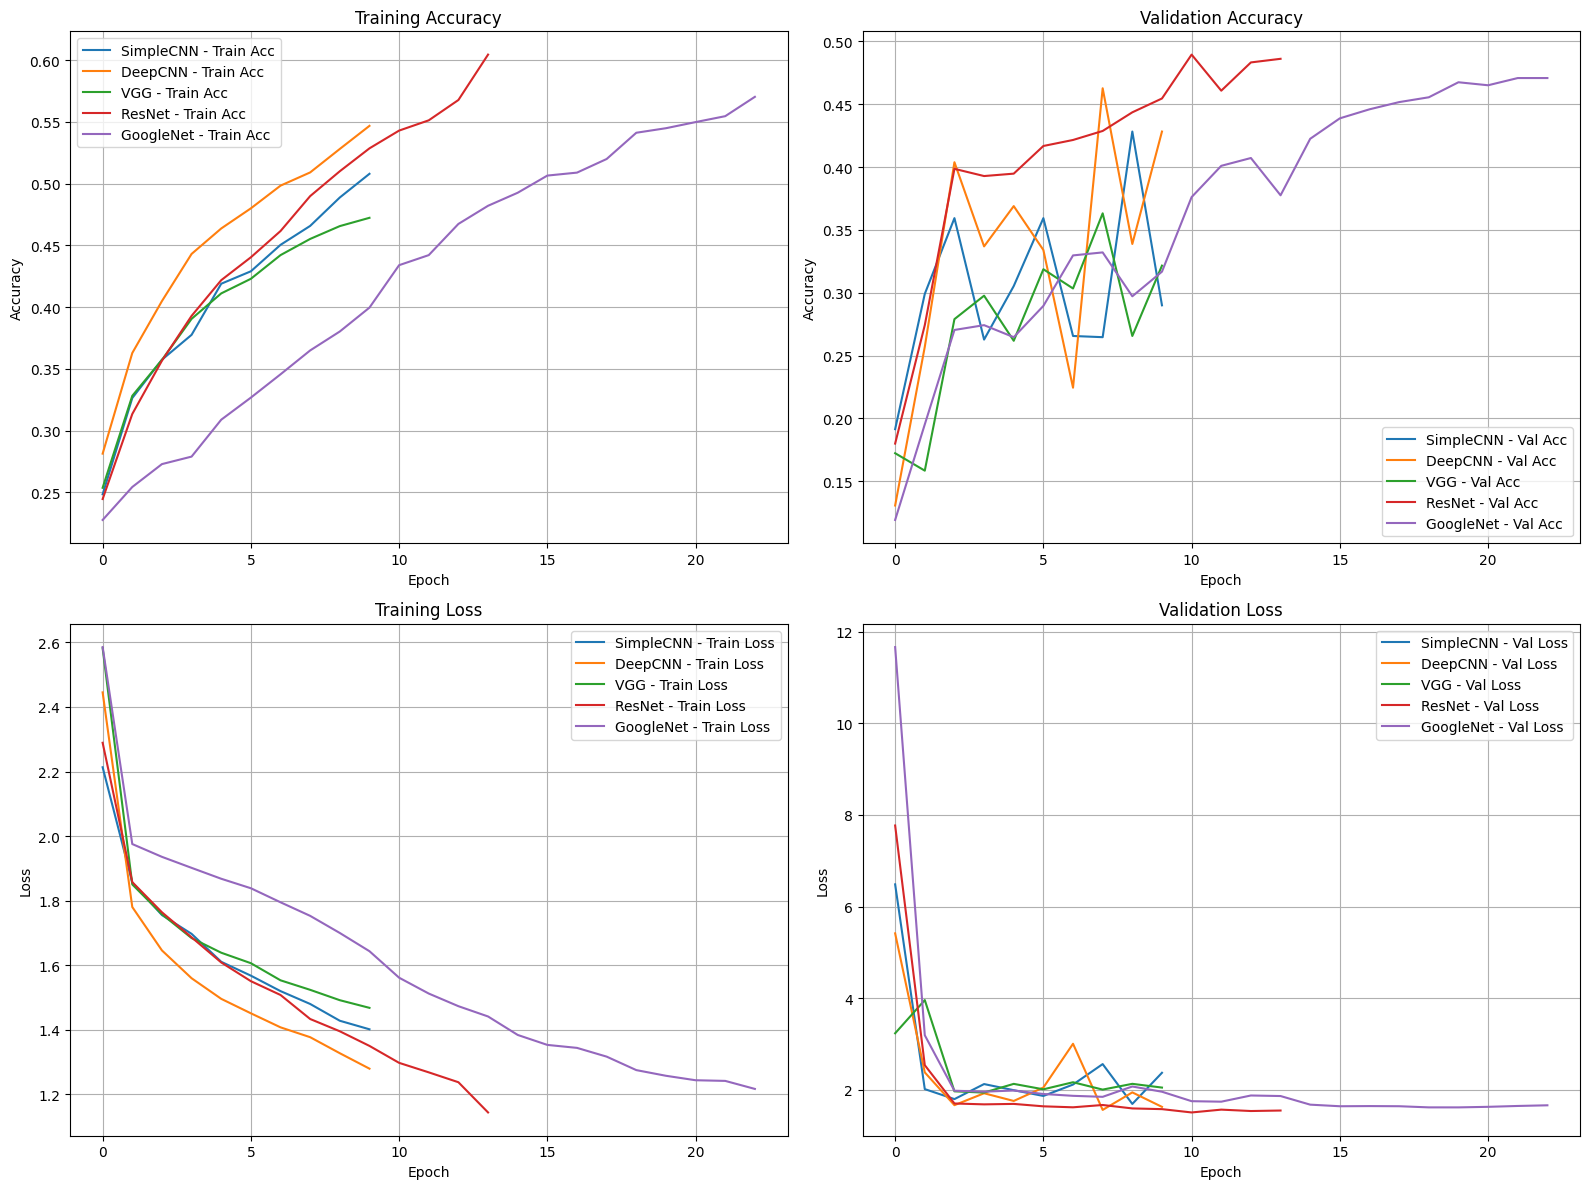

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# ✅ 1) Train Accuracy
for name, history in histories.items():
    axes[0, 0].plot(history.history['accuracy'], label=f'{name} - Train Acc')
axes[0, 0].set_title('Training Accuracy')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True)

# ✅ 2) Validation Accuracy
for name, history in histories.items():
    axes[0, 1].plot(history.history['val_accuracy'], label=f'{name} - Val Acc')
axes[0, 1].set_title('Validation Accuracy')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True)

# ✅ 3) Train Loss
for name, history in histories.items():
    axes[1, 0].plot(history.history['loss'], label=f'{name} - Train Loss')
axes[1, 0].set_title('Training Loss')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()
axes[1, 0].grid(True)

# ✅ 4) Validation Loss
for name, history in histories.items():
    axes[1, 1].plot(history.history['val_loss'], label=f'{name} - Val Loss')
axes[1, 1].set_title('Validation Loss')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()

plt.savefig('/content/drive/MyDrive/DL_PROJECT/model_comparison_plots.png', dpi=300)

plt.show()


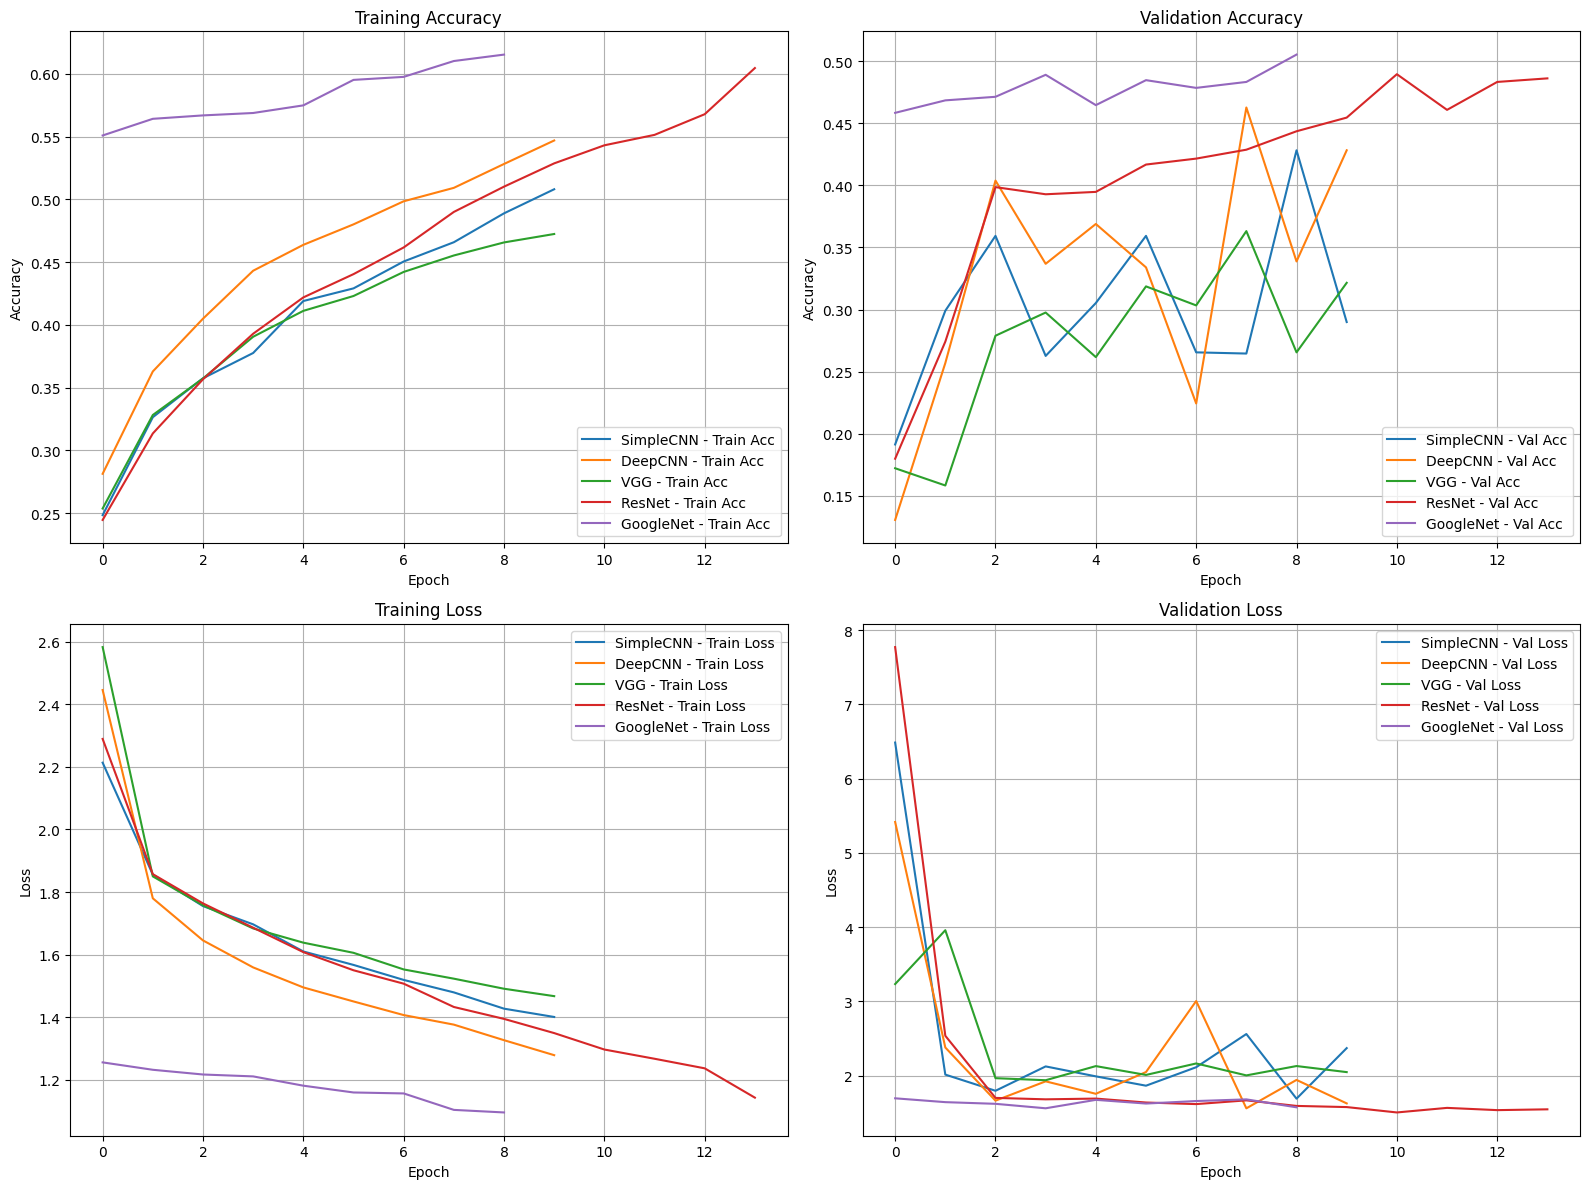

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# ✅ 1) Train Accuracy
for name, history in histories.items():
    axes[0, 0].plot(history.history['accuracy'], label=f'{name} - Train Acc')
axes[0, 0].set_title('Training Accuracy')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True)

# ✅ 2) Validation Accuracy
for name, history in histories.items():
    axes[0, 1].plot(history.history['val_accuracy'], label=f'{name} - Val Acc')
axes[0, 1].set_title('Validation Accuracy')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True)

# ✅ 3) Train Loss
for name, history in histories.items():
    axes[1, 0].plot(history.history['loss'], label=f'{name} - Train Loss')
axes[1, 0].set_title('Training Loss')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()
axes[1, 0].grid(True)

# ✅ 4) Validation Loss
for name, history in histories.items():
    axes[1, 1].plot(history.history['val_loss'], label=f'{name} - Val Loss')
axes[1, 1].set_title('Validation Loss')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()

plt.savefig('/content/drive/MyDrive/DL_PROJECT/model_comparison_plots.png', dpi=300)

plt.show()
